# how to reduce overfitting
- 1. get more data
- 2. reduce the complexity of the model
- 3. add regularization
- 4. add dropout
- 5. data augmentation
- 6. early stopping
- 7. batch normalization
- 8. ensemble learning
- 9. cross validation
- 10. transfer learning

## dataset

- link: https://www.kaggle.com/datasets/shubh0799/churn-modelling

In [ ]:
%pip install pandas scikit-learn matplotlib tensorflow

In [21]:
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, BatchNormalization, Dropout
from keras.regularizers import l2
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('assets/Churn_Modelling.csv')

In [ ]:
display(df.sample(5))

In [5]:
input_data = df.iloc[:,:-1]
output_data = df.iloc[:,-1]

input_data = input_data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


In [6]:
# Preprocessing

numeric_features = input_data.select_dtypes(include=['number']).columns
categorical_features = input_data.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

xtrain, xtest, ytrain, ytest = train_test_split(input_data, output_data, test_size=0.2, random_state=10)

xtrain = preprocessor.fit_transform(xtrain)
xtest = preprocessor.transform(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)


(8000, 13) (2000, 13) (8000,) (2000,)


In [25]:
ann = Sequential()

ann.add(Dense(8, input_shape=(xtrain.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dropout(0.2)) 
ann.add(Dense(6, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(3, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(3, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(BatchNormalization())
ann.add(Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = ann.fit(xtrain, ytrain, batch_size=200, epochs=55, validation_data=(xtest, ytest), callbacks=[EarlyStopping(patience=2)])

Epoch 1/55


/Users/hi/jitenStuff/MyGit/AI-ML-DL/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4996 - loss: 1.0769 - val_accuracy: 0.7890 - val_loss: 1.0061
Epoch 2/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5932 - loss: 1.0019 - val_accuracy: 0.7890 - val_loss: 0.9705
Epoch 3/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - loss: 0.9500 - val_accuracy: 0.7890 - val_loss: 0.9328
Epoch 4/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7173 - loss: 0.9061 - val_accuracy: 0.7890 - val_loss: 0.8911
Epoch 5/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7457 - loss: 0.8626 - val_accuracy: 0.7890 - val_loss: 0.8524
Epoch 6/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7707 - loss: 0.8263 - val_accuracy: 0.7880 - val_loss: 0.8126
Epoch 7/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7872 - loss: 0.7911 - val_accuracy: 0.7890 - val_loss: 0.7812
Epoch 8/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7896 - loss: 0.7558 - val_accuracy: 0.7895 - val_loss: 0.7498
Epo

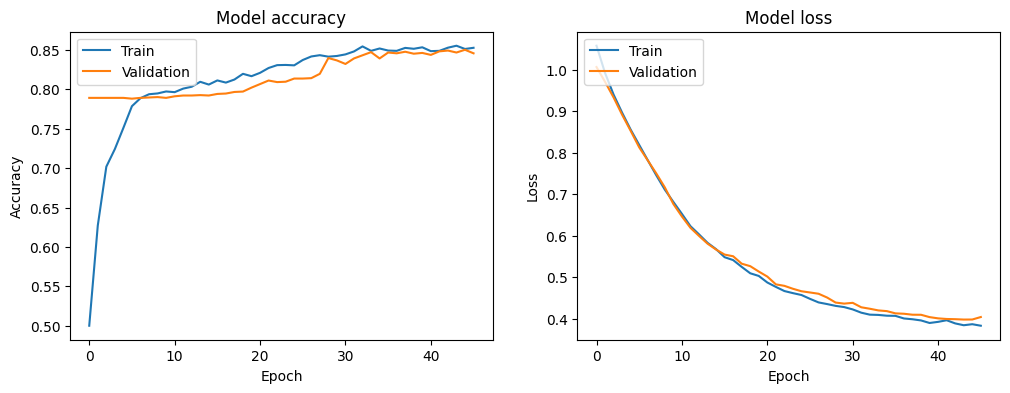

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [27]:
# test prediction

test_prediction = ann.predict(xtest)
test_prediction_data = []
for p in test_prediction:
    if p[0] > 0.5:
        test_prediction_data.append(1)
    else:
        test_prediction_data.append(0)

accuracy_score(ytest, test_prediction_data)*100

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


84.55

In [28]:
# train prediction

train_prediction = ann.predict(xtrain)
train_prediction_data = []
for p in train_prediction:
    if p[0] > 0.5:
        train_prediction_data.append(1)
    else:
        train_prediction_data.append(0)

accuracy_score(ytrain, train_prediction_data)*100

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


85.775